In [218]:
import pandas as pd
import os
import math
import matplotlib.pyplot as plt

### task 1: merge data for 12 months into 1 file

In [219]:
df = pd.read_csv('Sales_Data/Sales_July_2019.csv')

print(df.shape)
df.head()

(14371, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [220]:
import os

folder = 'Sales_Data'
months_dfs = []
 
for filename in os.listdir(folder):
    file = os.path.join(folder, filename)
    # check if this is a csv file
    if os.path.isfile(file) and file[-4:] == '.csv':
        months_dfs.append(pd.read_csv(file))

print(len(months_dfs)) # 12 months 
year_df = pd.concat(months_dfs)
print(year_df.shape)
year_df.head()
year_df.to_csv("year_sales.csv", index = False)

12
(186850, 6)


In [221]:
year_df = pd.read_csv("year_sales.csv")
year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### add columns to the data: month, 

In [222]:
months = ['Jannuary', 'February', 'March', 'Aprill', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

year_df = year_df.drop(year_df[year_df['Order Date'] == 'Order Date'].index)

year_df['Month Number'] = [str(date)[0:2] for date in year_df['Order Date']]
year_df = year_df.drop(year_df[year_df['Month Number'] == 'na'].index) # delete useless rows 
year_df = year_df.dropna(how = 'all')

# check if df is ok 
for date in year_df['Order Date']:
    if str(date)[0:2] == 'Or' or str(date)[0:2] == 'na':
        print("'" + str(date) + "'")
print(sorted(set(year_df['Month Number'])))

year_df['Month Number'] = year_df['Month Number'].astype('int')

year_df['Month'] = [months[month - 1] for month in year_df['Month Number']]
year_df.head()


['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,December
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,December
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,December
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,December
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,December


### question: what was the best month for sales? how much was earned that month? 

#### convert columns to numeric types

In [223]:
year_df['Quantity Ordered'] = year_df['Quantity Ordered'].astype('int')
year_df['Price Each'] = pd.to_numeric(year_df['Price Each'])

In [224]:
# year_df['Total Profit'] = [float(price) * float(quantity) for price, quantity in zip(year_df['Price Each'], year_df['Quantity Ordered'])]
year_df['Total Profit'] = year_df['Quantity Ordered'] * year_df['Price Each']
year_df.head()




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month,Total Profit
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,December,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,December,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,December,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,December,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,December,11.95


#### One way to count the best month

In [225]:
month_sales = {}
for month in months:
    month_sales[month] = sum(year_df[year_df['Month'] == month]['Total Profit'])
print(month_sales)
max_month = max(month_sales, key=lambda month: month_sales[month])
print(max_month, month_sales[max_month])

{'Jannuary': 1822256.729999914, 'February': 2202022.4199999636, 'March': 2807100.3800003603, 'Aprill': 3390670.240000704, 'May': 3152606.750000553, 'June': 2577802.2600001763, 'July': 2647775.7600002377, 'August': 2244467.8799999943, 'September': 2097560.129999891, 'October': 3736726.8800009703, 'November': 3199603.200000589, 'December': 4613443.340001534}
December 4613443.340001534


#### another way to do the same: (much simpler)

In [226]:
by_months = year_df.groupby('Month Number').sum()
by_months

,Quantity Ordered,Price Each,Total Profit
Month Number,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


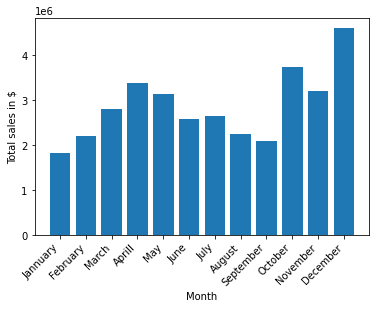

In [227]:
plt.bar(months, by_months['Total Profit'])
plt.xticks(rotation=45, ha="right")
plt.xlabel('Month')
plt.ylabel('Total sales in $')
plt.show()

### Question 2 : what city had the most number of sales? 

In [228]:
year_df.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month,Total Profit
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,December,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,December,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,December,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,December,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,December,11.95


#### Add the city column

In [229]:
def get_city(address):
    return address.split(', ')[1]

def get_state(address):
    return address.split(', ')[2].split()[0]


# year_df['City'] = [address.split(', ')[1] for address in year_df['Purchase Address']]
year_df['City'] = year_df['Purchase Address'].apply(lambda address: f"{get_city(address)} {get_state(address)}") # same as the line above but shorter 
cities = sorted(set(year_df['City']))
print(cities)
year_df.head()

['Atlanta GA', 'Austin TX', 'Boston MA', 'Dallas TX', 'Los Angeles CA', 'New York City NY', 'Portland ME', 'Portland OR', 'San Francisco CA', 'Seattle WA']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month,Total Profit,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,December,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,December,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,December,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,December,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,December,11.95,Atlanta GA


In [230]:
sales_per_city = year_df.groupby('City').count()
volume_per_city = year_df.groupby('City').sum()

In [231]:
sales_per_city

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month,Total Profit
City,,,,,,,,,
Atlanta GA,14881,14881,14881,14881,14881,14881,14881,14881,14881
Austin TX,9905,9905,9905,9905,9905,9905,9905,9905,9905
Boston MA,19934,19934,19934,19934,19934,19934,19934,19934,19934
Dallas TX,14820,14820,14820,14820,14820,14820,14820,14820,14820
Los Angeles CA,29605,29605,29605,29605,29605,29605,29605,29605,29605
New York City NY,24876,24876,24876,24876,24876,24876,24876,24876,24876
Portland ME,2455,2455,2455,2455,2455,2455,2455,2455,2455
Portland OR,10010,10010,10010,10010,10010,10010,10010,10010,10010
San Francisco CA,44732,44732,44732,44732,44732,44732,44732,44732,44732


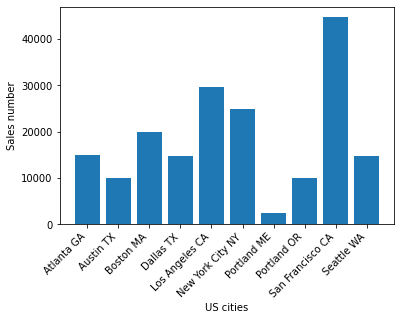

In [232]:
# cities = [city for city, df in year_df.groupby('City')] # to make sure cities are in the same order (not needed here)

plt.bar(sorted(cities), sales_per_city['Product'])
plt.xlabel('US cities')
plt.ylabel('Sales number')
plt.xticks(rotation=45, ha="right")
plt.show()
# Answer to question 2 

In [233]:
volume_per_city

,Quantity Ordered,Price Each,Month Number,Total Profit
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


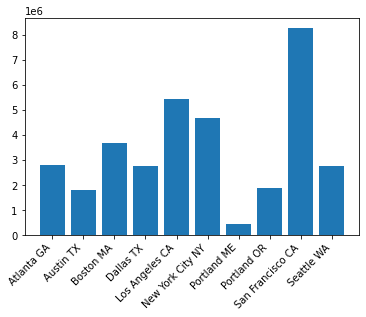

In [234]:
plt.bar(sorted(cities), volume_per_city['Total Profit'])
plt.xticks(rotation=45, ha="right")
plt.show()

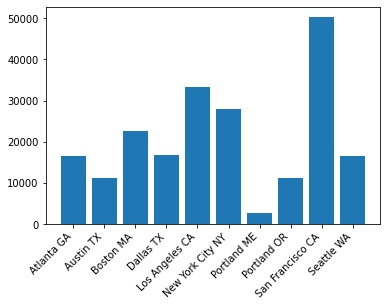

In [235]:
plt.bar(sorted(cities), volume_per_city['Quantity Ordered'])
plt.xticks(rotation=45, ha="right")
plt.show()

### Question 3: what time would be the best to advertise the shop?

In [236]:
year_df['Order Date'] = pd.to_datetime(year_df['Order Date'])
year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month,Total Profit,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,December,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,December,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,December,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,December,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,December,11.95,Atlanta GA


In [237]:
year_df['Hour'] = year_df['Order Date'].dt.hour
year_df['Minute'] = year_df['Order Date'].dt.minute
year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month,Total Profit,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,December,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,December,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,December,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,December,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,December,11.95,Atlanta GA,12,38


In [238]:
volume_by_hours = year_df.groupby('Hour').sum()
sales_by_hours = year_df.groupby('Hour').count()
volume_by_hours

,Quantity Ordered,Price Each,Month Number,Total Profit,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


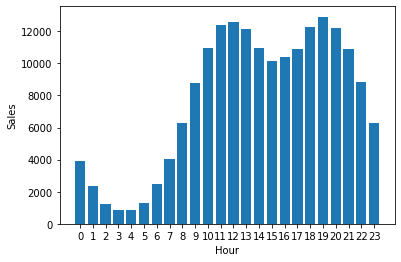

In [239]:
hours = [hour for hour, df in year_df.groupby('Hour')]
plt.bar(hours, sales_by_hours['Product'])
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.show()

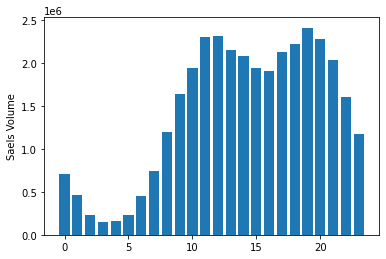

In [240]:
plt.bar(hours, volume_by_hours['Total Profit'])
plt.ylabel('Saels Volume')
plt.show()


#### Get this analytics on specific cities - it is basically the same plot everywhere (I have checked)

### Question 4: what products are most often sold together?

In [241]:
year_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month,Total Profit,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,December,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,December,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,December,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,December,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,December,11.95,Atlanta GA,12,38


Sold together: means that the Purchase Address is the same and Order Date is the same -> try to find these rows (groupby ? )

Add a column that contains both order date and address

In [242]:
year_df['Address + Date'] = year_df['Purchase Address'] + ' ' + year_df['Order Date'].astype('str')
year_df.head()
# year_df.groupby('Address + Date').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Number,Month,Total Profit,City,Hour,Minute,Address + Date
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,December,1700.00,New York City NY,0,1,"136 Church St, New York City, NY 10001 2019-12..."
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,December,600.00,New York City NY,7,3,"562 2nd St, New York City, NY 10001 2019-12-29..."
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,December,11.95,New York City NY,18,21,"277 Main St, New York City, NY 10001 2019-12-1..."
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,December,149.99,San Francisco CA,15,13,"410 6th St, San Francisco, CA 94016 2019-12-22..."
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,December,11.95,Atlanta GA,12,38,"43 Hill St, Atlanta, GA 30301 2019-12-18 12:38:00"


In [260]:
counted_by_same = year_df.groupby('Order ID').count()

year_df['Sold Together'] = [counted_by_same['Month Number'][order_id] for order_id in year_df['Order ID']]

In [298]:
year_df[year_df['Sold Together'] > 1]
# orders = {"order id": [222] (unique!), "items in order": ["product 1 product 2 product 3"], "number of items": [3]}
# year_df.set_index('Order ID', inplace=True)

products = []
order_ids = []
for order_id, df in year_df.groupby('Order ID'):
    order_ids.append(order_id)
    products.append(df['Product'].values)
orders = pd.DataFrame(data = {"Order ID": order_ids, "Items": products})
orders.head()


,Order ID,Items
0,141234,[iPhone]
1,141235,[Lightning Charging Cable]
2,141236,[Wired Headphones]
3,141237,[27in FHD Monitor]
4,141238,[Wired Headphones]


In [ ]:
# another way to do the same: 
new_df = year_df[year_df['Order ID'].duplicated(keep=False)]
new_df['Products Group'] = year_df.groupby('Order ID')['Product'].transform(lambda arr: ', '.join(arr))
new_df = new_df[['Order ID', 'Products Group']].drop_duplicates()
new_df.head()

In [299]:
orders['Items Number'] = orders['Items'].apply(lambda arr: len(arr))
orders.set_index('Order ID', inplace=True)
orders.head()


,Items,Items Number
Order ID,,
141234,[iPhone],1
141235,[Lightning Charging Cable],1
141236,[Wired Headphones],1
141237,[27in FHD Monitor],1
141238,[Wired Headphones],1


In [300]:
orders[orders['Items Number'] > 1].head()

,Items,Items Number
Order ID,,
141275,"[USB-C Charging Cable, Wired Headphones]",2
141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]",2
141365,"[Vareebadd Phone, Wired Headphones]",2
141384,"[Google Phone, USB-C Charging Cable]",2
141450,"[Google Phone, Bose SoundSport Headphones]",2


In [301]:
orders['Items str'] = orders['Items'].apply(lambda arr: ', '.join(arr))
together_orders = orders[orders['Items Number'] > 1]
frequent_items = together_orders.groupby('Items str').count()
frequent_items = frequent_items.sort_values('Items Number', ascending=False)
frequent_items.head(30)

,Items,Items Number
Items str,,
"iPhone, Lightning Charging Cable",882,882
"Google Phone, USB-C Charging Cable",856,856
"iPhone, Wired Headphones",361,361
"Vareebadd Phone, USB-C Charging Cable",312,312
"Google Phone, Wired Headphones",303,303
"iPhone, Apple Airpods Headphones",286,286
"Google Phone, Bose SoundSport Headphones",161,161
"Vareebadd Phone, Wired Headphones",104,104
"Google Phone, USB-C Charging Cable, Wired Headphones",77,77


### Question 5: what product was sold the most? 

In [323]:
products_by_quantity = year_df.groupby('Product').sum()[['Quantity Ordered']]
products_by_quantity.sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


In [324]:
products_by_profit = year_df.groupby('Product').sum()[['Total Profit']]
products_by_profit.sort_values('Total Profit', ascending=False)

,Total Profit
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56
34in Ultrawide Monitor,2355558.01
Apple Airpods Headphones,2349150.00
Flatscreen TV,1445700.00
Bose SoundSport Headphones,1345565.43


In [343]:
products = [product for product, df in year_df.groupby('Product')]
prices = year_df.groupby('Product').mean()['Price Each']

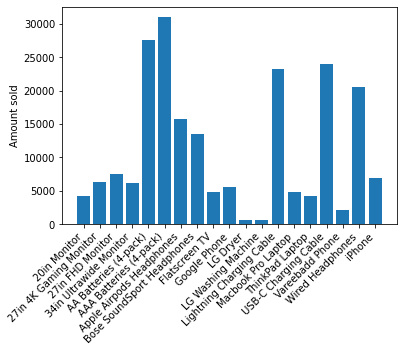

In [333]:
plt.bar(products, products_by_quantity['Quantity Ordered'])
plt.xticks(rotation=45, ha="right")
plt.ylabel('Amount sold')
plt.show()

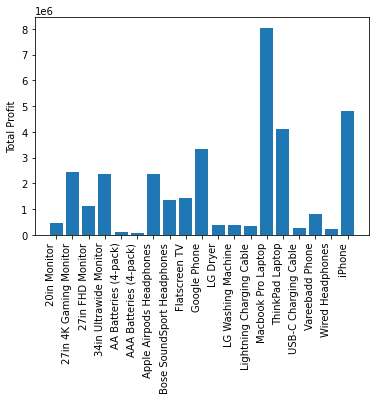

In [332]:
plt.bar(products, products_by_profit['Total Profit'])
plt.xticks(rotation=90, ha="right")
plt.ylabel('Total Profit')
plt.show()

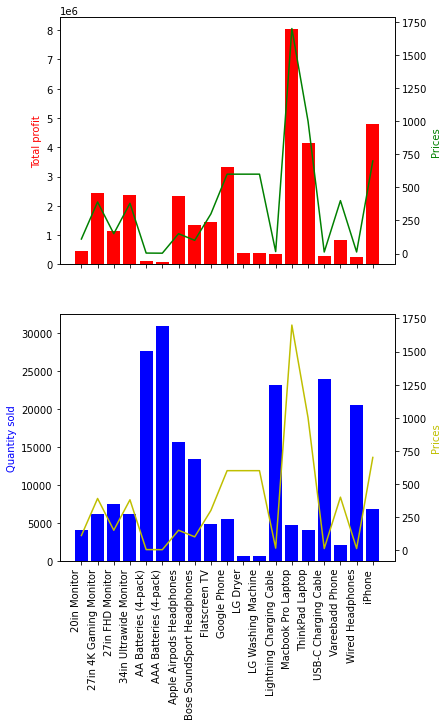

In [360]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

plt.xticks(rotation=90, ha="right")

ax1.bar(products, products_by_profit['Total Profit'], color='r')
ax1.set_ylabel('Total profit', color='r')

ax2.bar(products, products_by_quantity['Quantity Ordered'], color='b')
ax2.set_ylabel('Quantity sold', color='b')

ax3 = ax1.twinx()
ax3.plot(products, prices, color='g')
ax3.set_ylabel('Prices', color='g')

ax4 = ax2.twinx()
ax4.plot(products, prices, color='y')
ax4.set_ylabel('Prices', color='y')

fig.set_figheight(10)

plt.show()